### 1. Imports

In [47]:
#data manipulation imports
import pandas as pd
import numpy as np

#visualization imports
import matplotlib.pyplot as plt
import matplotlib as m
import plotly.graph_objects as go

### 2.Function to Create Graphics

In [48]:
def plot_graph(countries):
    
    selected_years =  list(df1.columns)

    # Converting DataFrame Data to Numeric Format
    df_numeric = df1.apply(pd.to_numeric, errors='coerce')

    # Create the Graph
    fig, ax = plt.subplots(figsize=(12, 6))

    for country in selected_countries:
        country_data = np.array(df_numeric.loc[country, selected_years])
        ax.plot(selected_years, country_data, label=country)

    ax.set_title('GDP by Country and Year')
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP')
    ax.legend()

    plt.xticks(rotation=45)  # Rotate X-axis Labels for Better Readability
    plt.tight_layout()  # Adjusting Chart Layout to Avoid Clipping

    plt.show()

### 3.Load Data

In [49]:
# Reads the xls file and creates a DataFrame
df_raw = pd.read_excel('gdp_global1.xls')
df_raw.head()

,Real GDP growth (Annual percent change),1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,8.7,0.7,11.8,5.4,13.3,3.9,20.6,8.4,6.5,14,5.7,2.7,1,2.2,2.6,1.2,3.9,-2.4,no data,no data,no data,no data,no data,no data,no data,no data
1,Albania,2.7,5.7,2.9,1.1,2,-1.5,5.6,-0.8,-1.4,9.8,-10,-28,-7.2,9.6,9.4,8.9,9.1,-10.9,8.8,12.9,6.9,8.3,4.5,5.5,5.5,5.5,5.9,6,7.5,3.4,3.7,2.5,1.4,1,1.8,2.2,3.3,3.8,4,2.1,-3.5,8.5,3.7,2.2,3.3,3.4,3.4,3.4,3.4
2,Algeria,-5.4,3,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,4.8,0.8,-1.2,1.6,-2.1,-0.9,3.8,3.8,1.1,5.1,3.2,3.8,3,5.6,7.2,4.3,5.9,1.7,3.4,2.4,1.6,3.6,2.9,3.4,2.8,3.8,3.7,3.2,1.4,1.2,1,-5.1,3.4,2.9,2.6,2.6,2.2,2.1,1.7,1.8
3,Andorra,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,8.1,4.5,8.7,8.1,5.4,4.8,1.6,-5.6,-5.3,-2,0,-5,-3.5,2.5,1.4,3.7,0.3,1.6,2,-11.2,8.9,8.7,1.3,1.5,1.5,1.5,1.5,1.5
4,Angola,2.4,-4.4,0,4.2,6,3.5,2.9,4.1,6.1,0,-3.5,12.1,11.4,11,10.5,10.4,11.2,7.3,4.7,2.2,3.1,4.2,13.7,3,11,15,11.5,14,11.2,0.9,4.9,3.5,8.5,5,4.8,0.9,-2.6,-0.2,-1.3,-0.7,-5.6,1.1,2.8,3.5,3.7,4,4.1,4.2,4.2


### 3.1.Data Description

In [50]:
df = df_raw.copy()
df.shape

(230, 50)

The DataFrame has 230 rows and 50 columns.

In [51]:
df.dtypes.value_counts()

object    50
Name: count, dtype: int64

This result indicates a count of 50 objects in a specific column, with a data type of integer (int64).

### 3.2 Cheking missing values

In [52]:
#Checking the amount of null data in each column
df.isnull().sum().sort_values(ascending=False)

2004                                       2
2016                                       2
2006                                       2
2007                                       2
2008                                       2
2009                                       2
2010                                       2
2011                                       2
2012                                       2
2013                                       2
2014                                       2
2015                                       2
2017                                       2
1980                                       2
2018                                       2
2019                                       2
2020                                       2
2021                                       2
2022                                       2
2023                                       2
2024                                       2
2025                                       2
2026      

The columns initially have few null values, so an analysis will be conducted to decide whether to remove or fill the data.

### 3.3 Removing missing values

In [53]:
# Remove rows containing null values in any column
df1 = df.dropna()

Here, rows 228 (NaN) and 229 (©IMF, 2023) were removed as they had no valid values, thus resulting in their removal.

### 3.4 Renaming columns

In [54]:
df1 = df1.rename(columns={df1.columns[0]: 'Country'})
df1 = df1.set_index(['Country'])

### 4. Grouping the data

Next, the countries were grouped according to the same groupings as in the original data table.

In [91]:
major_advanced_economies_G7= [
    'Canada'
    ,'France'
    ,'Germany'
    ,'Italy'
    ,'Japan'
    ,'United Kingdom'
    ,'United States'
    ,'Major advanced economies (G7)'
]

other_advanced_economies = [
    'Andorra'
    ,'Aruba'
    ,'Hong Kong SAR'
    ,'Macao SAR'
    ,'San Marino'
]

emerging_market_and_developing_economies = [
    "Bangladesh"
    ,"Belarus"
    ,"Bulgaria"
    ,"Chile"
    ,"China, People's Republic of"
    ,"Colombia"
    ,"Costa Rica"
    ,"Croatia"
    ,"Czech Republic"
    ,"Dominican Republic"
    ,"Egypt"
    ,"El Salvador"
    ,"Hungary"
    ,"India"
    ,"Indonesia"
    ,"Iran"
    ,"Jordan"
    ,"Kenya"
    ,"Lebanon"
    ,"Malaysia"
    ,"Mexico"
    ,"Nigeria"
    ,"Pakistan"
    ,"Panama"
    ,"Peru"
    ,"Philippines"
    ,"Poland"
    ,"Romania"
    ,"Russian Federation"
    ,"Saudi Arabia"
    ,"South Africa"
    ,"Sri Lanka"
    ,"Thailand"
    ,"Türkiye, Republic of"
    ,"Ukraine"
    ,"Venezuela"
    ,"Vietnam"
]

advanced_economies = [
    "Andorra"
    ,"Aruba"
    ,"Australia"
    ,"Austria"
    ,"Bahrain"
    ,"Belgium"
    ,"Canada"
    ,"Cyprus"
    ,"Czech Republic"
    ,"Denmark"
    ,"Estonia"
    ,"Finland"
    ,"France"
    ,"Germany"
    ,"Greece"
    ,"Hong Kong SAR"
    ,"Iceland"
    ,"Ireland"
    ,"Israel"
    ,"Italy"
    ,"Japan"
    ,"Republic of Korea"
    ,"Kuwait"
    ,"Latvia"
    ,"Lithuania"
    ,"Luxembourg"
    ,"Macao SAR"
    ,"Malta"
    ,"Netherlands"
    ,"New Zealand"
    ,"Norway"
    ,"Oman"
    ,"Portugal"
    ,"Puerto Rico"
    ,"Qatar"
    ,"San Marino"
    ,"Singapore"
    ,"Slovak Republic"
    ,"Slovenia"
    ,"Spain"
    ,"Sweden"
    ,"Switzerland"
    ,"Taiwan Province of China",
    "United Arab Emirates"
    ,"United Kingdom"
    ,"United States"
]

emerging_and_developing_europe = [
    "Bulgaria"
    ,"Croatia"
    ,"Hungary"
    ,"Poland"
    ,"Romania"
    ,"Russian Federation"
    ,"Türkiye, Republic of"
    ,"Ukraine"
]

asean_5 = [
    "Indonesia"
    ,"Malaysia"
    ,"Philippines"
    ,"Singapore"
    ,"Thailand"
]

In [56]:
sub_saharan_africa = [
    "Angola"
    ,"Benin"
    ,"Botswana"
    ,"Burkina Faso"
    ,"Burundi"
    ,"Cabo Verde"
    ,"Cameroon"
    ,"Central African Republic"
    ,"Chad"
    ,"Comoros"
    ,"Dem. Rep. of the Congo"
    ,"Republic of Congo"
    ,"Côte d'Ivoire"
    ,"Djibouti"
    ,"Equatorial Guinea"
    ,"Eritrea"
    ,"Eswatini"
    "Ethiopia"
    ,"Gabon"
    ,"The Gambia"
    ,"Ghana"
    ,"Guinea"
    ,"Guinea-Bissau"
    ,"Kenya"
    ,"Lesotho"
    ,"Liberia"
    ,"Madagascar"
    ,"Malawi"
    ,"Mali"
    ,"Mauritania"
    ,"Mauritius"
    ,"Mozambique"
    ,"Namibia"
    ,"Niger"
    ,"Nigeria"
    ,"Rwanda"
    ,"São Tomé and Príncipe"
    ,"Senegal"
    ,"Seychelles"
    ,"Sierra Leone"
    ,"Somalia"
    ,"South Africa"
    ,"Republic of South Sudan"
    ,"Sudan"
    ,"Tanzania"
    ,"Togo"
    ,"Uganda"
    ,"Zambia"
    ,"Zimbabwe"
]

north_africa = [
    "Algeria"
    ,"Egypt"
    ,"Libya"
    ,"Morocco"
    ,"Sudan"
    ,"Tunisia"
]

africa = [
    "Algeria"
    ,"Egypt"
    ,"Libya"
    ,"Morocco"
    ,"Sudan"
    ,"Tunisia"
    ,"Angola"
    ,"Benin"
    ,"Botswana"
    ,"Burkina Faso"
    ,"Burundi"
    ,"Cabo Verde"
    ,"Cameroon"
    ,"Central African Republic"
    ,"Chad"
    ,"Comoros"
    ,"Dem. Rep. of the Congo"
    ,"Republic of Congo"
    ,"Côte d'Ivoire"
    ,"Djibouti"
    ,"Equatorial Guinea"
    ,"Eritrea","Eswatini"
    ,"Ethiopia"
    ,"Gabon"
    ,"The Gambia"
    ,"Ghana"
    ,"Guinea"
    ,"Guinea-Bissau"
    ,"Kenya"
    ,"Lesotho"
    ,"Liberia"
    ,"Madagascar"
    ,"Malawi"
    ,"Mali"
    ,"Mauritania"
    ,"Mauritius"
    ,"Mozambique"
    ,"Namibia"
    ,"Niger"
    ,"Nigeria"
    ,"Rwanda"
    ,"São Tomé and Príncipe"
    ,"Senegal"
    ,"Seychelles"
    "Sierra Leone"
    ,"Somalia"
    ,"South Africa"
    ,"Republic of South Sudan"
    ,"Sudan"
    ,"Tanzania"
    ,"Togo"
    ,"Uganda"
    ,"Zambia"
    ,"Zimbabwe"
]

In [57]:
euro_area = [
    "Austria"
    ,"Belgium"
    ,"Cyprus"
    ,"Estonia"
    ,"Finland"
    ,"France"
    ,"Germany"
    ,"Greece"
    ,"Ireland"
    ,"Italy"
    ,"Latvia"
    ,"Lithuania"
    "Luxembourg"
    ,"Malta"
    ,"Netherlands"
    ,"Portugal"
    ,"Slovak Republic"
    ,"Slovenia"
    ,"Spain"
]

european_union = [
    "Austria"
    ,"Belgium"
    ,"Bulgaria"
    ,"Croatia"
    ,"Cyprus"
    ,"Czech Republic"
    ,"Denmark"
    ,"Estonia"
    ,"Finland"
    ,"France"
    ,"Germany"
    ,"Greece"
    ,"Hungary"
    ,"Ireland"
    ,"Italy"
    ,"Latvia"
    ,"Lithuania"
    ,"Luxembourg"
    ,"Malta"
    ,"Netherlands"
    ,"Poland"
    ,"Portugal"
    ,"Romania"
    ,"Slovak Republic"
    "Slovenia"
    , "Spain"
    ,"Sweden"
]

europe = [
    "Albania"
    ,"Andorra"
    ,"Armenia"
    ,"Austria"
    ,"Azerbaijan"
    ,"Belarus"
    ,"Belgium"
    ,"Bosnia and Herzegovina"
    ,"Bulgaria"
    ,"Croatia"
    ,"Cyprus"
    ,"Czech Republic"
    ,"Denmark"
    ,"Estonia"
    ,"Finland"
    ,"France"
    ,"Georgia"
    ,"Germany"
    ,"Greece"
    ,"Hungary"
    ,"Iceland"
    ,"Ireland"
    ,"Italy"
    ,"Kazakhstan"
    ,"Kosovo"
    ,"Latvia"
    ,"Lithuania"
    ,"Luxembourg"
    ,"Malta"
    ,"Moldova"
    ,"Montenegro"
    ,"Netherlands"
    ,"North Macedonia"
    ,"Norway"
    ,"Poland"
    ,"Portugal"
    ,"Romania"
    ,"Russian Federation"
    ,"San Marino"
    ,"Serbia"
    ,"Slovak Republic"
    ,"Slovenia"
    ,"Spain"
    ,"Sweden"
    ,"Switzerland"
    ,"Republic of Turkiye"
    ,"Ukraine"
    ,"United Kingdom"
]

western_europe = [
    "Andorra"
    ,"Austria"
    ,"Belgium"
    ,"France"
    ,"Germany"
    ,"Luxembourg"
    ,"Netherlands"
    ,"Switzerland"
]

In [58]:
emerging_and_developing_asia = [
    "Bangladesh"
    ,"China"
    ,"India"
    ,"Indonesia"
    ,"Iran"
    ,"Jordan"
    ,"Lebanon"
    ,"Malaysia"
    ,"Pakistan"
    ,"Philippines"
    ,"Sri Lanka"
    ,"Thailand"
    ,"Republic of Turkiye"
    ,"Vietnam"
]

middle_east = [
    "Bahrain"
    ,"Iran"
    ,"Iraq"
    ,"Israel"
    ,"Jordan"
    ,"Kuwait"
    ,"Lebanon"
    ,"Oman"
    ,"Qatar"
    ,"Saudi Arabia"
    ,"Syria"
    ,"United Arab Emirates"
    ,"Yemen"
]

southeast_asia = [
    "Brunei Darussalam"
    ,"Cambodia","Indonesia"
    ,"Lao P.D.R."
    ,"Malaysia"
    ,"Myanmar"
    ,"Philippines"
    ,"Singapore"
    ,"Thailand"
    ,"Timor-Leste"
    ,"Vietnam"
]

south_asia = [
    "Afghanistan"
    ,"Bangladesh"
    ,"Bhutan"
    ,"India"
    ,"Nepal"
    ,"Pakistan"
    ,"Sri Lanka"
]

east_asia = [
    "China"
    ,"Japan"
    ,"Republic of Korea"
    ,"Taiwan Province of China"
]

In [59]:
pacific_islands = [
    "Fiji"
    ,"Kiribati"
    , "Marshall Islands"
    ,"Fed. States of Micronesia"
    ,"Nauru","Palau"
    ,"Papua New Guinea"
    ,"Solomon Islands"
    ,"Tonga","Tuvalu"
    ,"Vanuatu"
]

australia_and_new_zealand = [
    "Australia"
    ,"New Zealand"
]

In [60]:
western_hemisphere = [
    "Argentina"
    ,"The Bahamas"
    ,"Barbados"
    ,"Belize"
    ,"Bolivia"
    ,"Brazil"
    ,"Canada"
    ,"Chile"
    ,"Colombia"
    ,"Costa Rica"
    ,"Dominica"
    ,"Dominican Republic"
    ,"Ecuador"
    ,"El Salvador"
    ,"Grenada"
    ,"Guatemala"
    ,"Guyana"
    ,"Haiti"
    ,"Honduras"
    ,"Jamaica"
    ,"Mexico"
    ,"Nicaragua"
    ,"Panama"
    ,"Paraguay"
    ,"Peru"
    ,"Saint Kitts and Nevis"
    ,"Saint Lucia"
    ,"Saint Vincent and the Grenadines"
    ,"Suriname"
    ,"Trinidad and Tobago"
    ,"United States"
    ,"Uruguay"
    "Venezuela"
]

south_america = [
    "Antigua and Barbuda"
    ,"Argentina"
    ,"Bolivia"
    ,"Brazil"
    ,"Chile"
    ,"Colombia"
    ,"Ecuador"
    ,"Guyana"
    ,"Paraguay"
    ,"Peru"
    ,"Suriname"
    ,"Uruguay"
    ,"Venezuela"
]

north_america = [
    "Canada"
    ,"United States"
]

central_america = [
    "Belize"
    ,"Costa Rica"
    ,"El Salvador"
    ,"Guatemala"
    ,"Honduras"
    ,"Nicaragua"
    ,"Panama"
]

caribbean = [
    "Antigua and Barbuda"
    ,"The Bahamas"
    ,"Barbados"
    ,"Dominica"
    ,"Dominican Republic"
    ,"Grenada"
    ,"Haiti"
    ,"Jamaica"
    ,"Saint Kitts and Nevis"
    ,"Saint Lucia"
    ,"Saint Vincent and the Grenadines"
    ,"Trinidad and Tobago"
]

In [61]:
asia_and_pacific = [
    "Afghanistan"
    ,"Bangladesh"
    ,"Bhutan"
    ,"Brunei Darussalam"
    ,"Cambodia"
    ,"China"
    ,"Fiji"
    ,"India"
    ,"Indonesia"
    ,"Iran"
    ,"Japan"
    ,"Kazakhstan"
    ,"Kiribati"
    ,"Kyrgyz Republic"
    ,"Lao P.D.R."
    ,"Malaysia"
    ,"Maldives"
    ,"Marshall Islands"
    ,"Fed. States of Micronesia"
    ,"Mongolia"
    ,"Myanmar"
    ,"Nauru"
    ,"Nepal"
    ,"New Zealand"
    ,"Pakistan"
    ,"Palau"
    ,"Papua New Guinea"
    ,"Philippines"
    ,"Samoa"
    ,"Singapore"
    ,"Solomon Islands"
    ,"Republic of Korea"
    ,"Sri Lanka"
    ,"Taiwan Province of China"
    ,"Tajikistan"
    ,"Thailand"
    ,"Timor-Leste"
    ,"Tonga"
    ,"Turkmenistan"
    ,"Tuvalu"
    ,"Uzbekistan"
    ,"Vanuatu"
    ,"Vietnam"
    ,"Belize"
    ,"Costa Rica"
    ,"El Salvador"
    ,"Guatemala"
    ,"Honduras"
    ,"Nicaragua"
    ,"Panama"
]

middle_east_and_central_asia = [
    "Afghanistan"
    ,"Armenia"
    ,"Azerbaijan"
    ,"Bahrain"
    ,"Iran"
    ,"Iraq"
    ,"Israel"
    ,"Jordan"
    ,"Kazakhstan"
    ,"Kuwait"
    ,"Kyrgyz Republic"
    ,"Lebanon"
    ,"Oman"
    ,"Pakistan"
    ,"Qatar"
    ,"Saudi Arabia"
    ,"Syria"
    ,"Tajikistan"
    ,"Turkmenistan"
    ,"United Arab Emirates"
    ,"Uzbekistan"
    ,"Yemen"
]

central_asia_and_the_caucasus = [
    "Armenia"
    ,"Azerbaijan"
    ,"Georgia"
    ,"Kazakhstan"
    ,"Kyrgyz Republic"
    ,"Tajikistan"
    ,"Turkmenistan"
    ,"Uzbekistan"
]

latin_america_and_the_caribbean = [
    "Antigua and Barbuda"
    ,"Argentina"
    ,"The Bahamas"
    ,"Barbados"
    ,"Belize"
    ,"Bolivia"
    ,"Brazil"
    ,"Chile"
    ,"Colombia"
    ,"Costa Rica"
    ,"Dominica"
    ,"Dominican Republic"
    ,"Ecuador"
    ,"El Salvador"
    ,"Grenada"
    ,"Guatemala"
    ,"Guyana"
    ,"Haiti"
    ,"Honduras"
    ,"Jamaica"
    ,"Mexico"
    ,"Nicaragua"
    ,"Panama"
    ,"Paraguay"
    ,"Peru"
    ,"Saint Kitts and Nevis"
    ,"Saint Lucia"
    ,"Saint Vincent and the Grenadines"
    ,"Suriname"
    ,"Trinidad and Tobago"
    ,"Uruguay"
    ,"Venezuela"
]

### 4.1 Country Groups with Missing Data

For the following analysis, only country groups with missing data were taken into account. The objective is to explore whether there is any correlation in the data among countries within the same region in terms of politics and economy.

#### other_advanced_economies

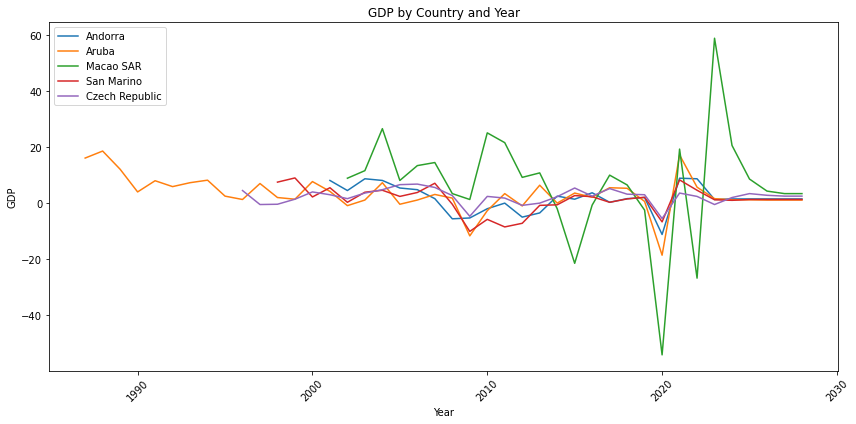

In [62]:
countries = list(df1.index.unique())
selected_countries = ['Andorra','Aruba', 'Macao SAR','San Marino', 'Czech Republic']
plot_graph(selected_countries)

With the exception of Macao SAR, which shows higher data volatility over the years, all other countries exhibit greater stability, with similar trends in their movements.

#### Sovietic_Union_Countries

Countries that were part of the former Soviet Union were grouped together to understand if, due to economic and political conflicts, these countries might have been similarly affected.

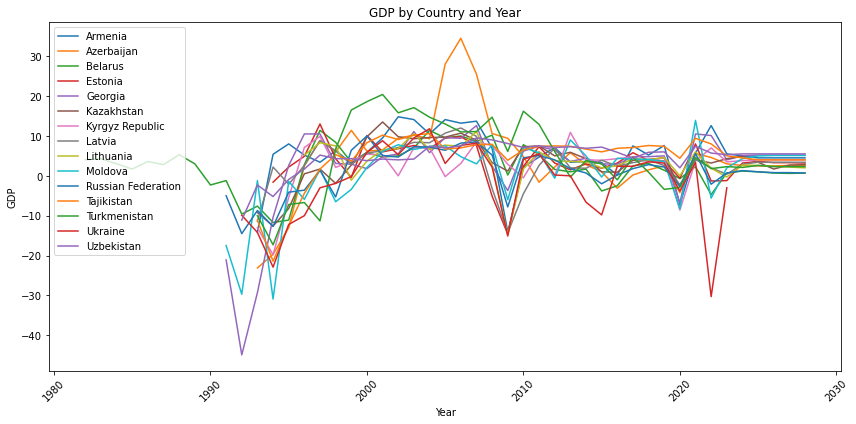

In [63]:
countries = list(df1.index.unique())
selected_countries = ["Armenia","Azerbaijan","Belarus","Estonia","Georgia", "Kazakhstan", "Kyrgyz Republic", "Latvia","Lithuania",
                      "Moldova", "Russian Federation", "Tajikistan", "Turkmenistan", "Ukraine", "Uzbekistan"]
plot_graph(selected_countries)

#### Middle East and Central Asia

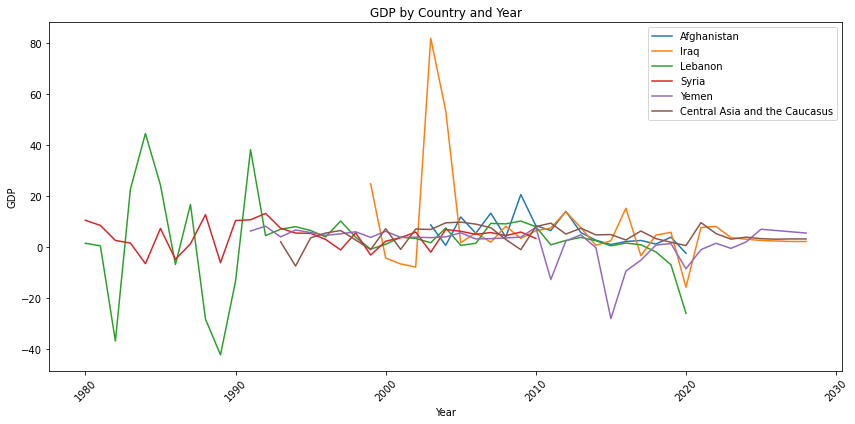

In [64]:
countries = list(df1.index.unique())
selected_countries = ["Afghanistan","Iraq","Lebanon","Syria","Yemen","Central Asia and the Caucasus"]
plot_graph(selected_countries)

#### Former Yugoslavia

For this group, countries that were part of the former Yugoslavia were taken into consideration. As the graph below indicates, they follow similar patterns over the years, except for a few exceptions.

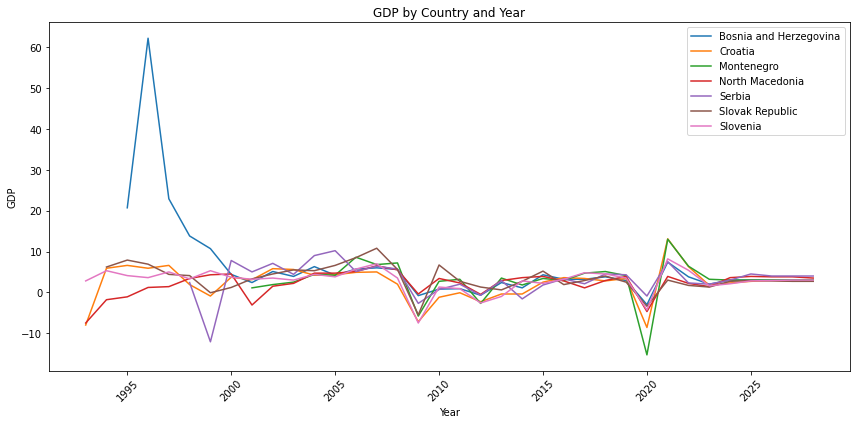

In [65]:
countries = list(df1.index.unique())
selected_countries = ['Bosnia and Herzegovina','Croatia','Montenegro','North Macedonia ','Serbia','Slovak Republic','Slovenia']
plot_graph(selected_countries)

#### Africa

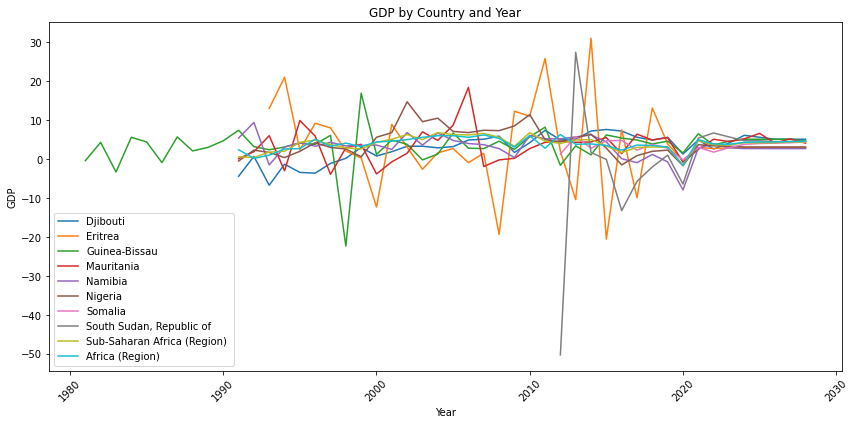

In [66]:
countries = list(df1.index.unique())
selected_countries = ["Djibouti", "Eritrea","Guinea-Bissau","Mauritania","Namibia","Nigeria","Somalia","South Sudan, Republic of",
                      "Sub-Saharan Africa (Region) ", "Africa (Region)"]
plot_graph(selected_countries)

#### Pacific Island

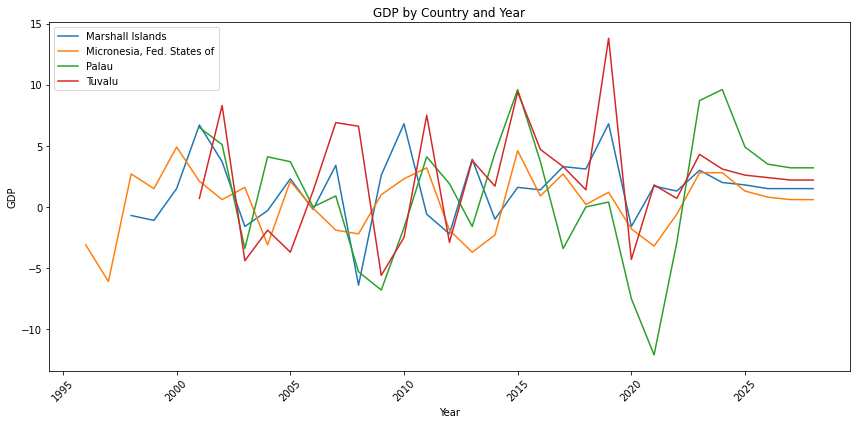

In [67]:
countries = list(df1.index.unique())
selected_countries = ["Marshall Islands","Micronesia, Fed. States of","Palau","Tuvalu"]
plot_graph(selected_countries)

#### Asia and Pacific

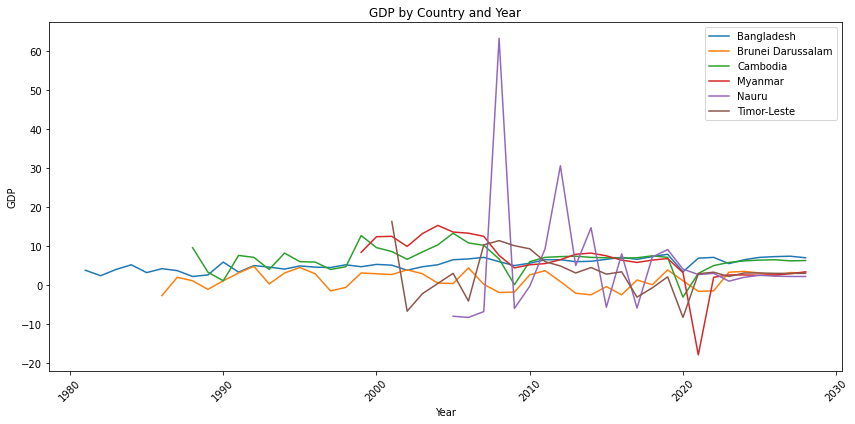

In [68]:
countries = list(df1.index.unique())
selected_countries = ["Bangladesh","Brunei Darussalam","Cambodia","Myanmar","Nauru","Timor-Leste"]
plot_graph(selected_countries)

#### Euro Area

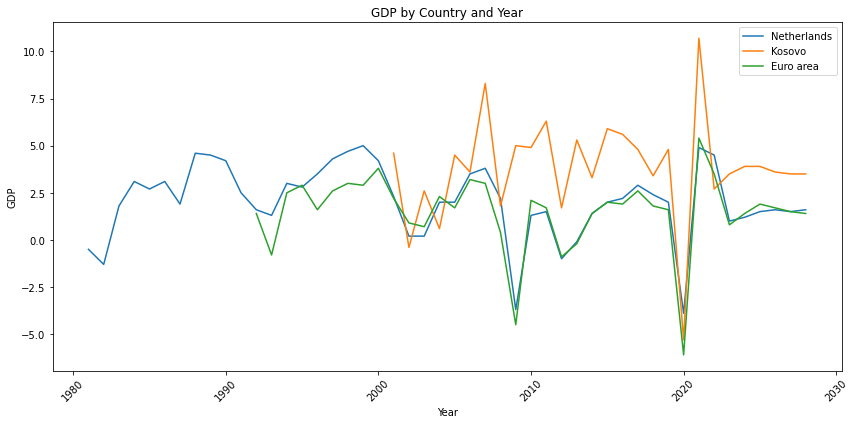

In [69]:
countries = list(df1.index.unique())
selected_countries =  ["Netherlands", "Kosovo","Euro area"]
plot_graph(selected_countries)

## 5. Filling in the Missing Data

For the first part, when there are one or two missing data points in a country's history, those data points will be filled with the country's average.

In [70]:
df1.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,8.7,0.7,11.8,5.4,13.3,3.9,20.6,8.4,6.5,14,5.7,2.7,1,2.2,2.6,1.2,3.9,-2.4,no data,no data,no data,no data,no data,no data,no data,no data
Albania,2.7,5.7,2.9,1.1,2,-1.5,5.6,-0.8,-1.4,9.8,-10,-28,-7.2,9.6,9.4,8.9,9.1,-10.9,8.8,12.9,6.9,8.3,4.5,5.5,5.5,5.5,5.9,6,7.5,3.4,3.7,2.5,1.4,1,1.8,2.2,3.3,3.8,4,2.1,-3.5,8.5,3.7,2.2,3.3,3.4,3.4,3.4,3.4
Algeria,-5.4,3,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,4.8,0.8,-1.2,1.6,-2.1,-0.9,3.8,3.8,1.1,5.1,3.2,3.8,3,5.6,7.2,4.3,5.9,1.7,3.4,2.4,1.6,3.6,2.9,3.4,2.8,3.8,3.7,3.2,1.4,1.2,1,-5.1,3.4,2.9,2.6,2.6,2.2,2.1,1.7,1.8
Andorra,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,8.1,4.5,8.7,8.1,5.4,4.8,1.6,-5.6,-5.3,-2,0,-5,-3.5,2.5,1.4,3.7,0.3,1.6,2,-11.2,8.9,8.7,1.3,1.5,1.5,1.5,1.5,1.5
Angola,2.4,-4.4,0,4.2,6,3.5,2.9,4.1,6.1,0,-3.5,12.1,11.4,11,10.5,10.4,11.2,7.3,4.7,2.2,3.1,4.2,13.7,3,11,15,11.5,14,11.2,0.9,4.9,3.5,8.5,5,4.8,0.9,-2.6,-0.2,-1.3,-0.7,-5.6,1.1,2.8,3.5,3.7,4,4.1,4.2,4.2


In [71]:
df2 = df1.copy()
df2 = df2.replace('no data', np.nan)

In [72]:
df2_replaced = df2[df2.isna().sum(axis=1).isin([1, 2])]
df2_replaced.head()
df_filtrado = df2_replaced[df2_replaced.isna().sum(axis=1).isin([1, 2])]
media_por_pais = df_filtrado.loc[:, 1980:2007].mean(axis=1, skipna=True)
df_filtrado.loc[:, 1980:2007] = df_filtrado.loc[:, 1980:2007].apply(lambda row: row.fillna(media_por_pais[row.name]), axis=1)
df4 = df_filtrado.copy()
df4 = df4.T
df4 = df4.reset_index().rename(columns={"index": "year"})
df4.head(5)

Country,year,Bangladesh,Belarus,Guinea-Bissau,Netherlands,Puerto Rico
0,1980,4.537037,2.776923,2.607407,2.62963,3.307407
1,1981,3.800000,2.776923,-0.500000,-0.50000,1.100000
2,1982,2.400000,4.000000,4.200000,-1.30000,-3.000000
3,1983,4.000000,4.300000,-3.400000,1.80000,0.500000
4,1984,5.200000,3.000000,5.500000,3.10000,7.300000


## 5. Filling in the remaining missing data

The following function aims to fill missing values using the mean of the complete group and the relationship between the existing values and the mean. This is done to assist in estimating missing values based on the overall behavior of the available data.

In [73]:
def fill_individual_countries(dataframe, countries):
    df = dataframe[countries+['year']].copy()
    
    check_na = df.isna().sum()
    null_values = list(check_na[check_na>0].index)

    complete_group = list(check_na[check_na==0].index)
    complete_group.remove('year')
    df_complete_group = dataframe[complete_group]

    df_aux = pd.DataFrame()
    df_aux["year"] = dataframe["year"]
    df_aux["year_average"] = df_complete_group.mean(axis=1)


    for country in null_values:
        df_aux[country] = dataframe[country]
        aux = df_aux[~df_aux[country].isna()]
        aux['comparison_result'] = aux.apply(lambda x: 1 if x[country] > x['year_average'] else 0, axis=1)


        most_common = aux['comparison_result'].value_counts().idxmax()
        if most_common == 0:
            df_aux.loc[df_aux[country].isna(), country] = df_aux.loc[df_aux[country].isna(), "year_average"] - df_aux[country].std()
        else:
            df_aux.loc[df_aux[country].isna(), country] = df_aux.loc[df_aux[country].isna(), "year_average"] + df_aux[country].std()

    return df_aux

### 5.1 Filling in data for African countries

In [74]:
africa = [
    "Angola","Benin","Botswana","Burkina Faso","Burundi","Cabo Verde",
    "Cameroon","Central African Republic","Chad","Comoros","Congo, Dem. Rep. of the",
    "Côte d'Ivoire","Djibouti","Equatorial Guinea","Eritrea","Eswatini",
    "Ethiopia","Gabon","Gambia, The","Ghana","Guinea", "Kenya","Lesotho","Liberia","Madagascar",
    "Malawi","Mali","Mauritania","Mauritius","Mozambique",
    "Namibia","Niger","Nigeria","Rwanda","São Tomé and Príncipe",
    "Senegal","Seychelles","Sierra Leone","Somalia","South Africa",
    "South Sudan, Republic of","Sudan","Tanzania","Togo","Uganda","Zambia", "Africa (Region)",
    "Zimbabwe", "Sub-Saharan Africa (Region) ", "Sub-Saharan Africa"
]

df_africa = df2.copy()
df_africa = df_africa.T
df_africa = df_africa.reset_index().rename(columns={"index": "year"}) 
pd.options.mode.chained_assignment = None
df_africa_filled = fill_individual_countries(df_africa, africa)

check_na = df_africa.isna().sum()
null_values = list(check_na[check_na>0].index)

df_africa_filled.head()

,year,year_average,Djibouti,Eritrea,Liberia,Mauritania,Namibia,Nigeria,Somalia,"South Sudan, Republic of",Africa (Region),Zimbabwe,Sub-Saharan Africa (Region),Sub-Saharan Africa
0,1980,1.615789,-1.855929,-8.790898,8.881745,-2.482350,-1.275110,-1.927039,0.150405,-13.663158,-0.046411,-6.516254,-0.212036,-0.295398
1,1981,1.768421,-1.703298,-8.638266,9.034377,-2.329718,-1.122478,-1.774408,0.303036,-13.510527,0.106221,-6.363622,-0.059404,-0.142767
2,1982,1.878947,-1.592771,-8.527740,9.144903,-2.219192,-1.011952,-1.663881,0.413562,-13.400001,0.216747,-6.253096,0.051122,-0.032240
3,1983,1.365789,-2.105929,-9.040898,8.631745,-2.732350,-1.525110,-2.177039,-0.099595,-13.913158,-0.296411,-6.766254,-0.462036,-0.545398
4,1984,1.981579,-1.490140,-8.425108,9.247535,-2.116560,-0.909320,-1.561250,0.516194,-13.297369,0.319379,-6.150464,0.153753,0.070391


### 5.2 Filling in data for Middle East and Central Asia countries

In [75]:
middle_east_and_central_asia = [
    "Afghanistan","Armenia","Azerbaijan","Bahrain","Iran","Iraq",
    "Israel","Jordan","Kazakhstan","Kuwait","Kyrgyz Republic","Lebanon", "Georgia",
    "Oman","Pakistan","Qatar","Saudi Arabia","Syria","Tajikistan",
    "Turkmenistan","United Arab Emirates","Uzbekistan","Yemen", "West Bank and Gaza", "Central Asia and the Caucasus"]

df_middle_east_and_central_asia = df2.copy()
df_middle_east_and_central_asia = df_middle_east_and_central_asia.T
df_middle_east_and_central_asia = df_middle_east_and_central_asia.reset_index().rename(columns={"index": "year"}) 
pd.options.mode.chained_assignment = None
df_middle_east_and_central_asia_filled = fill_individual_countries(
    df_middle_east_and_central_asia, middle_east_and_central_asia)

check_na = df_middle_east_and_central_asia.isna().sum()
null_values = list(check_na[check_na>0].index)

df_middle_east_and_central_asia_filled.head()


,year,year_average,Afghanistan,Armenia,Azerbaijan,Iraq,Kazakhstan,Kyrgyz Republic,Lebanon,Georgia,Syria,Tajikistan,Turkmenistan,Uzbekistan,Yemen,West Bank and Gaza,Central Asia and the Caucasus
0,1980,-0.39,5.400312,6.084115,-11.099632,17.765187,5.145882,5.660777,1.5,10.950763,10.5,6.303536,8.683724,3.602702,-7.22589,6.908693,3.239783
1,1981,2.72,8.510312,9.194115,-7.989632,20.875187,8.255882,8.770777,0.5,14.060763,8.5,9.413536,11.793724,6.712702,-4.11589,10.018693,6.349783
2,1982,1.03,6.820312,7.504115,-9.679632,19.185187,6.565882,7.080777,-36.8,12.370763,2.6,7.723536,10.103724,5.022702,-5.80589,8.328693,4.659783
3,1983,2.35,8.140312,8.824115,-8.359632,20.505187,7.885882,8.400777,22.7,13.690763,1.6,9.043536,11.423724,6.342702,-4.48589,9.648693,5.979783
4,1984,4.37,10.160312,10.844115,-6.339632,22.525187,9.905882,10.420777,44.5,15.710763,-6.5,11.063536,13.443724,8.362702,-2.46589,11.668693,7.999783


### 5.3 Filling in data for former Yugoslavia countries

In [76]:
former_yugoslavia = [
    'Bosnia and Herzegovina', 'Croatia','Montenegro','North Macedonia ','Serbia','Slovak Republic','Slovenia','Eastern Europe ']

df_former_yugoslavia = df2.copy()
df_former_yugoslavia = df_former_yugoslavia.T
df_former_yugoslavia = df_former_yugoslavia.reset_index().rename(columns={"index": "year"}) 
pd.options.mode.chained_assignment = None
df_former_yugoslavia_filled = fill_individual_countries(
    df_former_yugoslavia, former_yugoslavia)

check_na = df_former_yugoslavia.isna().sum()
null_values = list(check_na[check_na>0].index)

df_former_yugoslavia_filled.head()

,year,year_average,Bosnia and Herzegovina,Croatia,Montenegro,North Macedonia,Serbia,Slovak Republic,Slovenia
0,1980,-0.9,10.277143,-5.134847,3.963593,2.033626,3.209313,2.214272,2.042475
1,1981,-2.6,8.577143,-6.834847,2.263593,0.333626,1.509313,0.514272,0.342475
2,1982,0.5,11.677143,-3.734847,5.363593,3.433626,4.609313,3.614272,3.442475
3,1983,4.5,15.677143,0.265153,9.363593,7.433626,8.609313,7.614272,7.442475
4,1984,2.9,14.077143,-1.334847,7.763593,5.833626,7.009313,6.014272,5.842475


### 5.4 Filling in data for advanced economies group

In [77]:
advanced_economies = ['Andorra','Aruba','Macao SAR','San Marino','Czech Republic','Advanced economies','Other advanced economies']

df_advanced_economies = df2.copy()
df_advanced_economies = df_advanced_economies.T
df_advanced_economies = df_advanced_economies.reset_index().rename(columns={"index": "year"}) 
pd.options.mode.chained_assignment = None
df_advanced_economies_filled = fill_individual_countries(
    df_advanced_economies, advanced_economies)

check_na = df_advanced_economies.isna().sum()
null_values = list(check_na[check_na>0].index)

df_advanced_economies_filled.head()

,year,year_average,Andorra,Aruba,Macao SAR,San Marino,Czech Republic
0,1980,2.55,-2.269816,8.932002,22.275501,-2.152324,5.276369
1,1981,3.10,-1.719816,9.482002,22.825501,-1.602324,5.826369
2,1982,1.20,-3.619816,7.582002,20.925501,-3.502324,3.926369
3,1983,3.60,-1.219816,9.982002,23.325501,-1.102324,6.326369
4,1984,5.70,0.880184,12.082002,25.425501,0.997676,8.426369


### 5.5 Filling in data for pacific island group

In [78]:
pacific_island = ["Fiji","Kiribati","Marshall Islands","Micronesia, Fed. States of","Nauru","Palau","Papua New Guinea",
                  "Solomon Islands", "Tonga","Tuvalu","Vanuatu","Pacific Islands "]

df_pacific_island = df2.copy()
df_pacific_island = df_pacific_island.T
df_pacific_island = df_pacific_island.reset_index().rename(columns={"index": "year"}) 
pd.options.mode.chained_assignment = None
df_pacific_island_filled = fill_individual_countries(
    df_pacific_island, pacific_island)

check_na = df_pacific_island.isna().sum()
null_values = list(check_na[check_na>0].index)

df_pacific_island_filled.head()

,year,year_average,Marshall Islands,"Micronesia, Fed. States of",Nauru,Palau,Tuvalu
0,1980,1.828571,-0.949074,-0.728704,-13.101000,-3.426046,-2.730523
1,1981,3.771429,0.993784,1.214153,-11.158143,-1.483189,-0.787666
2,1982,1.971429,-0.806216,-0.585847,-12.958143,-3.283189,-2.587666
3,1983,1.457143,-1.320502,-1.100133,-13.472429,-3.797475,-3.101952
4,1984,9.900000,7.122355,7.342724,-5.029571,4.645382,5.340905


### 5.6 Filling in data for asia and pacif countries

In [79]:
asia_and_pacific = ["Brunei Darussalam", "Cambodia", "Myanmar", "Timor-Leste","Asia and Pacific"]

df_asia_and_pacific = df2.copy()
df_asia_and_pacific = df_asia_and_pacific.T
df_asia_and_pacific = df_asia_and_pacific.reset_index().rename(columns={"index": "year"}) 
pd.options.mode.chained_assignment = None
df_asia_and_pacific_filled = fill_individual_countries(
    df_asia_and_pacific, asia_and_pacific)

check_na = df_asia_and_pacific.isna().sum()
null_values = list(check_na[check_na>0].index)

df_asia_and_pacific_filled.head()

,year,year_average,Brunei Darussalam,Cambodia,Myanmar,Timor-Leste
0,1980,4.4,2.15819,7.446866,10.463776,-0.920166
1,1981,5.2,2.95819,8.246866,11.263776,-0.120166
2,1982,4.2,1.95819,7.246866,10.263776,-1.120166
3,1983,5.4,3.15819,8.446866,11.463776,0.079834
4,1984,6.5,4.25819,9.546866,12.563776,1.179834


### 5.7 Filling in data for eastern europe countries

In [80]:
eastern_europe = ["Russian Federation","Ukraine","Moldova","Poland","Hungary","Romania","Bulgaria","Albania","Kosovo",
                  "Latvia","Lithuania","Estonia"]

df_eastern_europe = df2.copy()
df_eastern_europe = df_eastern_europe.T
df_eastern_europe = df_eastern_europe.reset_index().rename(columns={"index": "year"}) 
pd.options.mode.chained_assignment = None
df_eastern_europe_filled = fill_individual_countries(
    df_eastern_europe, eastern_europe)

check_na = df_eastern_europe.isna().sum()
null_values = list(check_na[check_na>0].index)

df_eastern_europe_filled.head()

,year,year_average,Russian Federation,Ukraine,Moldova,Kosovo,Latvia,Lithuania,Estonia
0,1980,1.18,-4.502153,-8.490939,-8.247066,3.98422,6.552442,5.597302,6.116858
1,1981,0.80,-4.882153,-8.870939,-8.627066,3.60422,6.172442,5.217302,5.736858
2,1982,1.80,-3.882153,-7.870939,-7.627066,4.60422,7.172442,6.217302,6.736858
3,1983,3.28,-2.402153,-6.390939,-6.147066,6.08422,8.652442,7.697302,8.216858
4,1984,2.98,-2.702153,-6.690939,-6.447066,5.78422,8.352442,7.397302,7.916858


### 5.8 Filling in data for latin america and caribbean countries

In [81]:
latin_america_and_the_caribbean = ["Antigua and Barbuda","Argentina","Bahamas, The","Barbados","Belize","Bolivia","Brazil",
                                   "Chile","Colombia","Costa Rica","Dominica","Dominican Republic","Ecuador","El Salvador",
                                   "Grenada","Guatemala","Guyana","Haiti","Honduras","Jamaica","Mexico","Nicaragua",
                                   "Panama","Paraguay","Peru","Saint Kitts and Nevis","Saint Lucia",
                                   "Saint Vincent and the Grenadines","Suriname","Trinidad and Tobago","Uruguay","Venezuela"]

df_latin_america_and_the_caribbean = df2.copy()
df_latin_america_and_the_caribbean = df_latin_america_and_the_caribbean.T
df_latin_america_and_the_caribbean = df_latin_america_and_the_caribbean.reset_index().rename(columns={"index": "year"}) 
pd.options.mode.chained_assignment = None
df_latin_america_and_the_caribbean_filled = fill_individual_countries(
    df_latin_america_and_the_caribbean, latin_america_and_the_caribbean)

check_na = df_latin_america_and_the_caribbean.isna().sum()
null_values = list(check_na[check_na>0].index)

df_latin_america_and_the_caribbean_filled.head()

,year,year_average,Venezuela
0,1980,4.458065,-4.9
1,1981,2.377419,-1.3
2,1982,-1.319355,2.6
3,1983,-0.522581,-9.9
4,1984,3.248387,5.2


### 5.9 Filling in data for euro area countries

In [82]:
euro_area = ["Austria","Belgium","Cyprus","Finland","France","Germany","Greece","Ireland","Italy","Luxembourg","Malta",
             "Portugal","Spain","Euro area"]

df_euro_area = df2.copy()
df_euro_area = df_euro_area.T
df_euro_area = df_euro_area.reset_index().rename(columns={"index": "year"}) 
pd.options.mode.chained_assignment = None
df_euro_area_filled = fill_individual_countries(
    df_euro_area, euro_area)

check_na = df_euro_area.isna().sum()
null_values = list(check_na[check_na>0].index)

df_euro_area_filled.head()

,year,year_average,Euro area
0,1980,3.553846,1.499319
1,1981,1.023077,-1.031450
2,1982,1.438462,-0.616065
3,1983,1.592308,-0.462219
4,1984,2.584615,0.530088


# 6. Grouping the filled data

In [83]:
df2_not_null = df2.copy()
df2_not_null = df2_not_null.dropna()
df2_transposed = df2_not_null.T
df2_transposed = df2_transposed.reset_index().rename(columns={"index": "year"})
df2_transposed

Country,year,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Australia,Austria,"Bahamas, The",Bahrain,Barbados,Belgium,Belize,Benin,Bhutan,Bolivia,Botswana,Brazil,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cameroon,Canada,Central African Republic,Chad,Chile,"China, People's Republic of",Colombia,Comoros,"Congo, Dem. Rep. of the","Congo, Republic of",Costa Rica,Cyprus,Côte d'Ivoire,Denmark,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eswatini,Ethiopia,Fiji,Finland,France,Gabon,"Gambia, The",Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guyana,Haiti,Honduras,Hong Kong SAR,Hungary,Iceland,India,Indonesia,Iran,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kenya,Kiribati,"Korea, Republic of",Kuwait,Lao P.D.R.,Lesotho,Libya,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritius,Mexico,Mongolia,Morocco,Mozambique,Nepal,New Zealand,Nicaragua,Niger,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,Saudi Arabia,Senegal,Seychelles,Sierra Leone,Singapore,Solomon Islands,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,São Tomé and Príncipe,Taiwan Province of China,Tanzania,Thailand,Togo,Tonga,Trinidad and Tobago,Tunisia,"Türkiye, Republic of",Uganda,United Arab Emirates,United Kingdom,United States,Uruguay,Vanuatu,Vietnam,Zambia,Asia and Pacific,Australia and New Zealand,Caribbean,Central America,East Asia,Eastern Europe,Europe,Middle East (Region),North Africa,North America,Pacific Islands,South America,South Asia,Southeast Asia,Western Europe,Western Hemisphere (Region),ASEAN-5,Advanced economies,Emerging and Developing Asia,Emerging and Developing Europe,Emerging market and developing economies,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,World
0,1980,2.7,-5.4,2.4,8.2,0.7,2.9,2.3,7.1,7.5,4.4,4.4,5.0,9.3,5.0,0.6,12.0,9.2,5.7,4.0,-6.8,5.3,9.9,2.2,-3.0,-6.0,7.9,7.9,4.4,7.4,2.4,12.7,0.8,5.9,5.2,-0.5,13.4,8.0,4.9,3.4,-8.6,4.8,-3.8,4.0,-1.7,5.7,1.8,0.0,0.7,1.3,0.5,0.7,15.1,3.7,2.6,-2.1,7.3,0.6,10.3,0.2,5.7,5.3,9.9,-21.6,2.9,3.6,3.1,-4.0,3.2,11.1,5.6,0.1,-1.6,-20.4,10.0,-0.8,0.6,3.2,0.8,0.4,7.4,18.8,3.3,7.0,-10.1,9.5,6.4,3.8,4.2,-2.3,1.0,4.6,4.9,4.5,6.1,6.9,4.5,-2.3,11.7,7.7,5.1,-6.0,6.7,-1.0,3.3,-3.6,1.3,-0.5,2.9,-6.1,5.7,-0.8,-2.3,-0.6,10.1,-2.7,6.6,1.2,5.8,2.5,-6.5,4.6,5.1,-1.1,8.0,3.3,4.6,-2.3,15.8,10.4,7.4,-0.8,-3.4,-1.8,-2.2,-0.3,6.0,5.5,-3.5,3.9,4.4,2.6,4.3,2.3,4.2,-0.9,1.4,-3.5,0.3,1.0,-1.9,5.7,5.2,7.0,1.6,2.2,7.7,1.3,6.3,-0.8,3.3,1.8,6.4,0.9,-1.9,3.8,2.1
1,1981,5.7,3.0,-4.4,3.8,-5.7,4.1,-0.1,-2.9,2.8,-1.9,-0.3,0.2,1.9,13.6,0.3,8.2,-4.4,5.3,2.7,12.2,8.4,17.1,3.5,13.0,-10.8,6.2,5.1,2.3,5.5,0.9,2.6,-2.3,3.1,3.5,-0.7,10.8,4.3,3.9,2.2,-5.7,5.8,6.9,0.0,6.0,1.3,1.1,-4.0,-9.5,0.1,-3.8,-1.6,1.4,0.6,0.6,0.6,1.1,-1.2,9.2,2.9,4.3,6.0,7.6,-5.7,2.5,4.7,0.6,4.4,4.2,15.0,4.1,0.2,7.2,-18.9,15.3,3.1,-20.0,0.8,-9.8,-5.2,6.9,7.9,-4.5,2.7,5.9,8.5,8.4,-2.8,5.0,8.3,3.0,5.4,-0.2,1.6,17.1,6.2,9.2,1.1,9.2,5.5,3.4,-10.0,3.5,-3.9,0.1,2.5,2.7,5.1,3.9,-9.1,1.9,5.1,-3.9,1.9,10.8,-1.8,5.4,-0.4,5.3,6.3,1.9,4.5,1.6,-10.3,7.1,0.5,5.9,-3.4,14.0,4.6,5.5,4.4,3.9,8.0,-0.9,2.5,1.9,4.4,5.8,6.6,5.2,3.9,2.2,1.4,4.8,-2.6,0.0,0.4,-3.6,3.3,2.5,-2.3,6.0,6.5,0.3,2.0,6.5,2.0,5.9,-0.5,1.9,0.1,0.9,2.0,-0.2,4.2,1.9
2,1982,2.9,6.4,0.0,-0.1,-3.1,0.1,1.9,6.3,6.4,-4.9,0.6,-7.6,1.7,8.2,-3.9,15.9,0.6,4.2,1.4,-1.1,2.8,7.6,-3.2,-3.6,5.4,-13.6,9.0,0.9,4.1,-0.5,2.4,-7.3,6.3,0.2,3.7,4.1,1.7,1.2,7.3,-6.3,2.2,1.4,1.0,-1.1,3.1,2.5,4.1,20.8,-0.8,-8.3,-1.1,4.1,-3.5,1.8,-8.9,-2.8,-2.1,2.9,2.8,2.2,3.5,2.2,23.2,1.5,1.4,0.2,3.1,3.3,5.8,5.1,0.7,8.3,-9.5,4.7,5.6,1.5,1.0,-1.9,2.5,5.9,7.5,-11.6,0.1,5.5,-0.5,8.3,9.6,-6.9,3.8,2.9,-0.8,2.2,0.2,11.5,7.6,5.3,0.8,-1.4,-0.3,3.6,-4.8,2.2,-8.2,3.9,-2.5,6.1,2.1,2.6,-1.0,-20.7,7.8,-2.1,1.8,7.1,-1.7,-0.4,1.2,5.2,4.1,-6.3,1.4,-1.3,3.1,4.8,0.6,5.4,-3.7,12.8,3.8,-0.5,3.4,8.2,-7.2,1.7,-1.8,-9.4,2.0,8.2,-2.9,4

In [84]:
pd.set_option('display.max_columns', None)
columns_to_drop = ['year_average_x', 'year_average_y']

merged_df = df_africa_filled.merge(df_middle_east_and_central_asia_filled, on='year').drop(columns_to_drop,axis=1)

merged_df1 = pd.merge(merged_df, df_former_yugoslavia_filled, on='year')
merged_df2 = pd.merge(merged_df1, df_advanced_economies_filled, on='year')

merged_df3 = pd.merge(merged_df2, df_pacific_island_filled, on='year').drop(columns_to_drop,axis=1)

merged_df4 = pd.merge(merged_df3, df_asia_and_pacific_filled, on='year')
merged_df5 = pd.merge(merged_df4, df_eastern_europe_filled, on='year').drop(columns_to_drop,axis=1)

merged_df6 = pd.merge(merged_df5, df_euro_area_filled, on='year')
merged_df7 = pd.merge(merged_df6, df4, on='year')

merged_df8 = pd.merge(merged_df7, df_latin_america_and_the_caribbean_filled, on='year')


countries = [
    'year_average_y',
    'year_average_x'
]

merged_df8 = merged_df8.drop(countries,axis=1)
merged_df8.head()

,year,Djibouti,Eritrea,Liberia,Mauritania,Namibia,Nigeria,Somalia,"South Sudan, Republic of",Africa (Region),Zimbabwe,Sub-Saharan Africa (Region),Sub-Saharan Africa,Afghanistan,Armenia,Azerbaijan,Iraq,Kazakhstan,Kyrgyz Republic,Lebanon,Georgia,Syria,Tajikistan,Turkmenistan,Uzbekistan,Yemen,West Bank and Gaza,Central Asia and the Caucasus,Bosnia and Herzegovina,Croatia,Montenegro,North Macedonia,Serbia,Slovak Republic,Slovenia,Andorra,Aruba,Macao SAR,San Marino,Czech Republic,Marshall Islands,"Micronesia, Fed. States of",Nauru,Palau,Tuvalu,Brunei Darussalam,Cambodia,Myanmar,Timor-Leste,Russian Federation,Ukraine,Moldova,Kosovo,Latvia,Lithuania,Estonia,Euro area,Bangladesh,Belarus,Guinea-Bissau,Netherlands,Puerto Rico,year_average,Venezuela
0,1980,-1.855929,-8.790898,8.881745,-2.482350,-1.275110,-1.927039,0.150405,-13.663158,-0.046411,-6.516254,-0.212036,-0.295398,5.400312,6.084115,-11.099632,17.765187,5.145882,5.660777,1.5,10.950763,10.5,6.303536,8.683724,3.602702,-7.22589,6.908693,3.239783,10.277143,-5.134847,3.963593,2.033626,3.209313,2.214272,2.042475,-2.269816,8.932002,22.275501,-2.152324,5.276369,-0.949074,-0.728704,-13.101000,-3.426046,-2.730523,2.15819,7.446866,10.463776,-0.920166,-4.502153,-8.490939,-8.247066,3.98422,6.552442,5.597302,6.116858,1.499319,4.537037,2.776923,2.607407,2.62963,3.307407,4.458065,-4.9
1,1981,-1.703298,-8.638266,9.034377,-2.329718,-1.122478,-1.774408,0.303036,-13.510527,0.106221,-6.363622,-0.059404,-0.142767,8.510312,9.194115,-7.989632,20.875187,8.255882,8.770777,0.5,14.060763,8.5,9.413536,11.793724,6.712702,-4.11589,10.018693,6.349783,8.577143,-6.834847,2.263593,0.333626,1.509313,0.514272,0.342475,-1.719816,9.482002,22.825501,-1.602324,5.826369,0.993784,1.214153,-11.158143,-1.483189,-0.787666,2.95819,8.246866,11.263776,-0.120166,-4.882153,-8.870939,-8.627066,3.60422,6.172442,5.217302,5.736858,-1.031450,3.800000,2.776923,-0.500000,-0.50000,1.100000,2.377419,-1.3
2,1982,-1.592771,-8.527740,9.144903,-2.219192,-1.011952,-1.663881,0.413562,-13.400001,0.216747,-6.253096,0.051122,-0.032240,6.820312,7.504115,-9.679632,19.185187,6.565882,7.080777,-36.8,12.370763,2.6,7.723536,10.103724,5.022702,-5.80589,8.328693,4.659783,11.677143,-3.734847,5.363593,3.433626,4.609313,3.614272,3.442475,-3.619816,7.582002,20.925501,-3.502324,3.926369,-0.806216,-0.585847,-12.958143,-3.283189,-2.587666,1.95819,7.246866,10.263776,-1.120166,-3.882153,-7.870939,-7.627066,4.60422,7.172442,6.217302,6.736858,-0.616065,2.400000,4.000000,4.200000,-1.30000,-3.000000,-1.319355,2.6
3,1983,-2.105929,-9.040898,8.631745,-2.732350,-1.525110,-2.177039,-0.099595,-13.913158,-0.296411,-6.766254,-0.462036,-0.545398,8.140312,8.824115,-8.359632,20.505187,7.885882,8.400777,22.7,13.690763,1.6,9.043536,11.423724,6.342702,-4.48589,9.648693,5.979783,15.677143,0.265153,9.363593,7.433626,8.609313,7.614272,7.442475,-1.219816,9.982002,23.325501,-1.102324,6.326369,-1.320502,-1.100133,-13.472429,-3.797475,-3.101952,3.15819,8.446866,11.463776,0.079834,-2.402153,-6.390939,-6.147066,6.08422,8.652442,7.697302,8.216858,-0.462219,4.000000,4.300000,-3.400000,1.80000,0.500000,-0.522581,-9.9
4,1984,-1.490140,-8.425108,9.247535,-2.116560,-0.909320,-1.561250,0.516194,-13.297369,0.319379,-6.150464,0.153753,0.070391,10.160312,10.844115,-6.339632,22.525187,9.905882,10.420777,44.5,15.710763,-6.5,11.063536,13.443724,8.362702,-2.46589,11.668693,7.999783,14.077143,-1.334847,7.763593,5.833626,7.009313,6.014272,5.842475,0.880184,12.082002,25.425501,0.997676,8.426369,7.122355,7.342724,-5.029571,4.645382,5.340905,4.25819,9.546866,12.563776,1.179834,-2.702153,-6.690939,-6.447066,5.78422,8.352442,7.397302,7.916858,0.530088,5.200000,3.000000,5.500000,3.10000,7.300000,3.248387,5.2


#### Organizing the table

In [85]:
complete_table = pd.merge(merged_df8, df2_transposed, on='year')
complete_table = complete_table.round(0)

countries_list = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", 
    "Argentina", "Armenia", "Aruba", "Australia", "Austria", "Azerbaijan", "Bahamas, The", 
    "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin", "Bhutan", 
    "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei Darussalam", "Bulgaria", 
    "Burkina Faso", "Burundi", "Cabo Verde", "Cambodia", "Cameroon", "Canada", 
    "Central African Republic", "Chad", "Chile", "China, People's Republic of", 
    "Colombia", "Comoros", "Congo, Dem. Rep. of the", "Costa Rica", "Croatia", "Cyprus", "Czech Republic", "Côte d'Ivoire", "Denmark", 
    "Djibouti", "Dominica", "Dominican Republic", "Ecuador", "Egypt", "El Salvador", 
    "Equatorial Guinea", "Eritrea", "Estonia", "Eswatini", "Ethiopia", "Fiji", "Finland", 
    "France", "Gabon", "Gambia, The", "Georgia", "Germany", "Ghana", "Greece", "Grenada", 
    "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Honduras", "Hong Kong SAR", 
    "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy", 
    "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Korea, Republic of", 
    "Kosovo", "Kuwait", "Kyrgyz Republic", "Lao P.D.R.", "Latvia", "Lebanon", "Lesotho", 
    "Liberia", "Libya", "Lithuania", "Luxembourg", "Macao SAR", "Madagascar", "Malawi", 
    "Malaysia", "Maldives", "Mali", "Malta", "Marshall Islands", "Mauritania", "Mauritius", 
    "Mexico", "Micronesia, Fed. States of", "Moldova", "Mongolia", "Montenegro", "Morocco", 
    "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand", 
    "Nicaragua", "Niger", "Nigeria", "North Macedonia ", "Norway", "Oman", "Pakistan", "Palau", 
    "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", 
    "Puerto Rico", "Qatar", "Romania", "Russian Federation", "Rwanda", "Saint Kitts and Nevis", 
    "Saint Lucia", "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Saudi Arabia", 
    "Senegal", "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovak Republic", 
    "Slovenia", "Solomon Islands", "Somalia", "South Africa", "South Sudan, Republic of", 
    "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland", "Syria", 
    "São Tomé and Príncipe", "Taiwan Province of China", "Tajikistan", "Tanzania", "Thailand", 
    "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago", "Tunisia", "Turkmenistan", 
    "Tuvalu", "Türkiye, Republic of", "Uganda", "Ukraine", "United Arab Emirates", 
    "United Kingdom", "United States", "Uruguay", "Uzbekistan", "Vanuatu", "Venezuela",
    "Vietnam", "West Bank and Gaza", "Yemen", "Zambia", "Zimbabwe",
    "Africa (Region)", "Asia and Pacific", "Australia and New Zealand", "Caribbean", 
    "Central America", "Central Asia and the Caucasus", "East Asia", "Eastern Europe ", 
    "Europe", "Europe", "North Africa", "North America", "Pacific Islands ", "South America", 
    "South Asia", "Southeast Asia", "Sub-Saharan Africa (Region) ", 
    "Western Hemisphere (Region)", "ASEAN-5", "Advanced economies", 
    "Emerging and Developing Asia", "Emerging and Developing Europe", 
    "Emerging market and developing economies", "Euro area", "European Union", 
    "Latin America and the Caribbean", "Major advanced economies (G7)", 
    "Middle East and Central Asia", "Other advanced economies", "Sub-Saharan Africa", "World"
]

df_sorted = complete_table.reindex(columns=['year'] + countries_list)
df_sorted.head()
df_sorted.to_excel('dados_finais_gpd.xlsx', index=False)

In [86]:
def visualize_graph(df, visualize_dict, print_null=True):
    num_graphs = len(visualize_dict)
    fig, axes = plt.subplots(nrows=num_graphs, ncols=1, figsize=(10, 4 * num_graphs), dpi=100)
    
    if num_graphs == 1:
        axes = [axes]  # Certifique-se de que 'axes' seja uma lista quando houver apenas um gráfico

    for (title, columns), ax in zip(visualize_dict.items(), axes):
        columns_with_null = []

        for column in columns:
            x_values = df['year'].values
            y_values = df[column].values
            
            ax.plot(x_values, y_values, label=column)
            
            if np.any(np.isnan(y_values)):
                columns_with_null.append(column)

        if print_null:
            ax.text(1.05, 0.5, f"Columns with null values: {columns_with_null}", transform=ax.transAxes, fontsize=9)

        ax.set_title(title)
        ax.set_xlabel('Year')
        ax.set_ylabel('Value')
        
        # Posicione a legenda fora da caixa, à direita do gráfico
        ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), prop={'size': 9})

    plt.tight_layout()
    plt.show()

# 7. Data filled

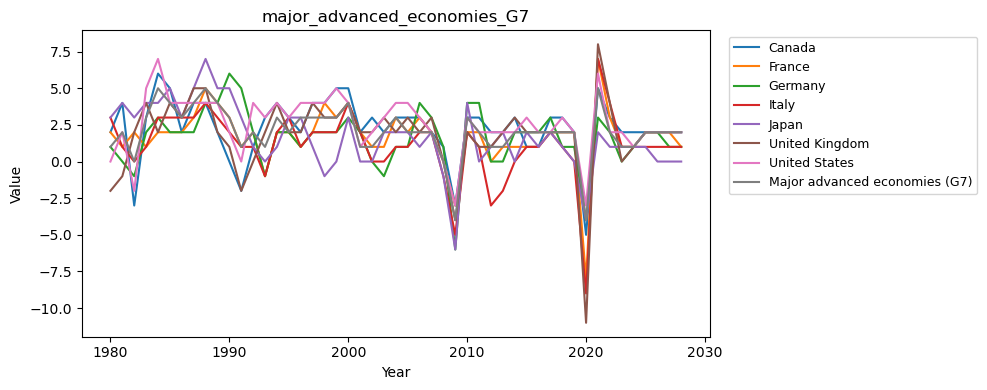

In [87]:
visualize_graph(df_sorted, {'major_advanced_economies_G7': major_advanced_economies_G7}, False)

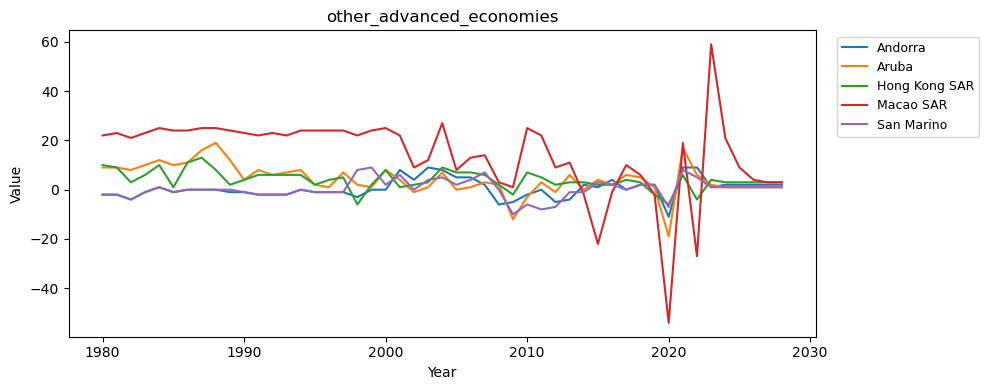

In [88]:
visualize_graph(df_sorted, {'other_advanced_economies':other_advanced_economies}, False)

C:\Users\Angelica\AppData\Local\Temp\ipykernel_20040\1359460328.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


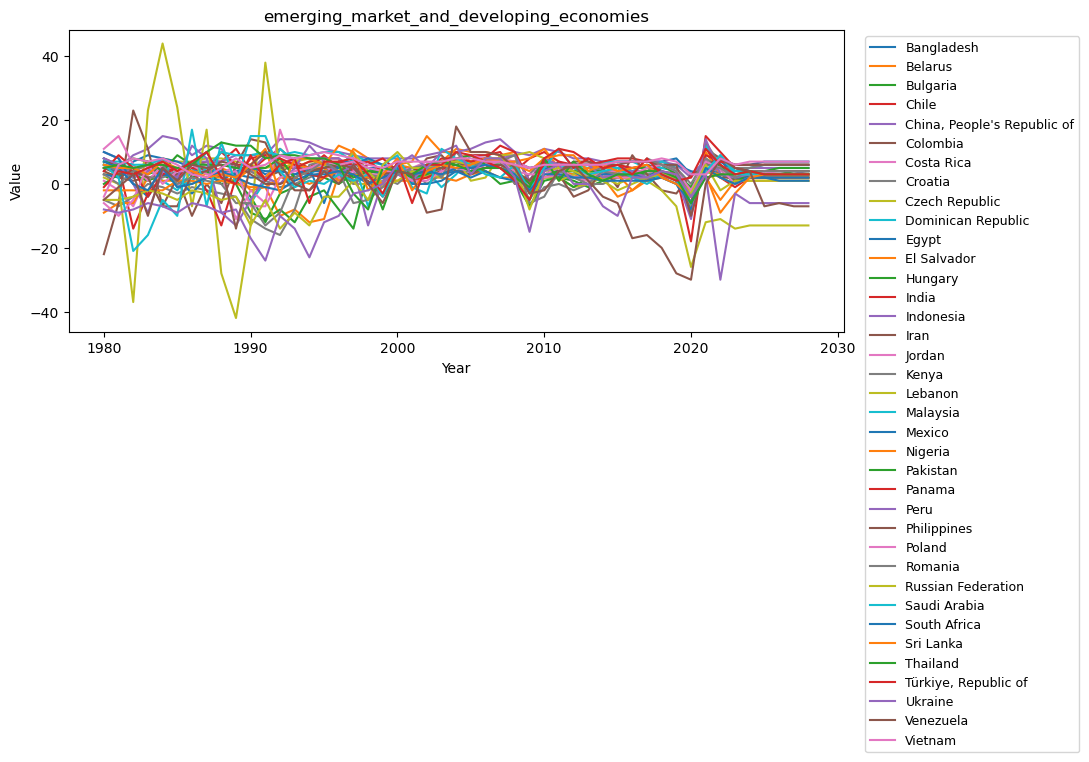

In [92]:
visualize_graph(df_sorted, {'emerging_market_and_developing_economies':emerging_market_and_developing_economies}, False)